In [44]:
import pandas as pd
from pymongo import MongoClient
from flask import Flask, request
import matplotlib.pyplot as plt

In [32]:
#lendo csv e importando para df
df = pd.read_csv(r'C:\Users\Denise_\Documents\Pi_DS\Módulo 4\Arqs\imob.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df[['qte_banheiros', 'qte_quartos', 'area', 'cep', 'preco']]
df

,qte_banheiros,qte_quartos,area,cep,preco
0,4.0,3.0,3923,85266,889000.0
1,5.0,5.0,4022,85262,910000.0
2,4.0,3.0,4116,85266,971226.0
3,5.0,4.0,4581,85266,1249000.0
4,4.0,3.0,2544,85262,799000.0
...,...,...,...,...,...
517,2.0,5.0,2066,94531,399900.0
518,3.5,4.0,9536,94531,460000.0
519,2.0,3.0,2014,94531,407000.0
520,3.0,4.0,2312,94531,419000.0


In [12]:
#criando collection 'imobiliaria'
client = MongoClient('mongodb://localhost:27017', retryWrites=False)
mydb = client["cadastro"]
mycol = mydb["imobiliaria"]

In [36]:
#transformando df em dict e inserindo dados na collection
dados = df.to_dict(orient='records')
dados
_ids = mycol.insert_many(dados)
print(_ids.inserted_ids)

[ObjectId('5e5523949aa915acf97b9c2f'), ObjectId('5e5523949aa915acf97b9c30'), ObjectId('5e5523949aa915acf97b9c31'), ObjectId('5e5523949aa915acf97b9c32'), ObjectId('5e5523949aa915acf97b9c33'), ObjectId('5e5523949aa915acf97b9c34'), ObjectId('5e5523949aa915acf97b9c35'), ObjectId('5e5523949aa915acf97b9c36'), ObjectId('5e5523949aa915acf97b9c37'), ObjectId('5e5523949aa915acf97b9c38'), ObjectId('5e5523949aa915acf97b9c39'), ObjectId('5e5523949aa915acf97b9c3a'), ObjectId('5e5523949aa915acf97b9c3b'), ObjectId('5e5523949aa915acf97b9c3c'), ObjectId('5e5523949aa915acf97b9c3d'), ObjectId('5e5523949aa915acf97b9c3e'), ObjectId('5e5523949aa915acf97b9c3f'), ObjectId('5e5523949aa915acf97b9c40'), ObjectId('5e5523949aa915acf97b9c41'), ObjectId('5e5523949aa915acf97b9c42'), ObjectId('5e5523949aa915acf97b9c43'), ObjectId('5e5523949aa915acf97b9c44'), ObjectId('5e5523949aa915acf97b9c45'), ObjectId('5e5523949aa915acf97b9c46'), ObjectId('5e5523949aa915acf97b9c47'), ObjectId('5e5523949aa915acf97b9c48'), ObjectId('5

In [127]:
#consultando dados da collection
mydb = client["cadastro"]
mycol = mydb["imobiliaria"]

df = pd.DataFrame(mycol.find())
df

,_id,qte_banheiros,qte_quartos,area,cep,preco
0,5e5523949aa915acf97b9c2f,100.0,100.0,3923,85266,889000.0
1,5e5523949aa915acf97b9c30,5.0,5.0,4022,85262,910000.0
2,5e5523949aa915acf97b9c31,4.0,3.0,4116,85266,971226.0
3,5e5523949aa915acf97b9c32,5.0,4.0,4581,85266,1249000.0
4,5e5523949aa915acf97b9c33,4.0,3.0,2544,85262,799000.0
...,...,...,...,...,...,...
517,5e5523949aa915acf97b9e34,2.0,5.0,2066,94531,399900.0
518,5e5523949aa915acf97b9e35,3.5,4.0,9536,94531,460000.0
519,5e5523949aa915acf97b9e36,2.0,3.0,2014,94531,407000.0
520,5e5523949aa915acf97b9e37,3.0,4.0,2312,94531,419000.0


 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5001/ (Press CTRL+C to quit)


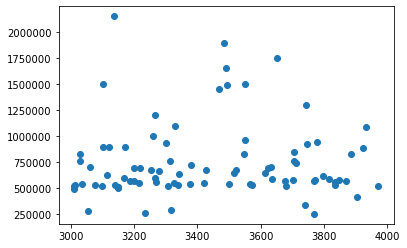

127.0.0.1 - - [25/Feb/2020 11:57:12] "GET /area/3000/4000 HTTP/1.1" 200 -


In [89]:
app = Flask(__name__)

@app.route("/area/<area_min>/<area_max>", methods=['GET'])
def area(area_min, area_max):
    area_min = int(area_min)
    area_max = int(area_max)
    
    query = { "$and" : [{"area":{"$gt":area_min}}, {"area":{"$lt":area_max }} ]}
    
    try:
        mydoc = mycol.find(query)
        df = pd.DataFrame(mydoc)
        
        plt.scatter(df['area'], df['preco'])
        plt.show()
      
        return df.to_json(default_handler=str, orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela.", 500

app.run(port=5001)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5001/ (Press CTRL+C to quit)


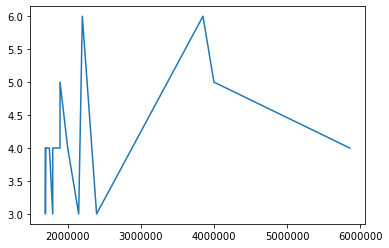

127.0.0.1 - - [25/Feb/2020 12:04:01] "GET /maior_preco HTTP/1.1" 200 -


In [97]:
@app.route("/maior_preco", methods=['GET'])
def maior_preco():

    try:
        mydoc = mycol.find().sort("preco", -1).limit(15)
        df = pd.DataFrame(mydoc)
        
        plt.plot(df['preco'], df['qte_quartos'])
        plt.show()
      
        return df.to_json(default_handler=str, orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela.", 500

app.run(port=5001)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5001/ (Press CTRL+C to quit)


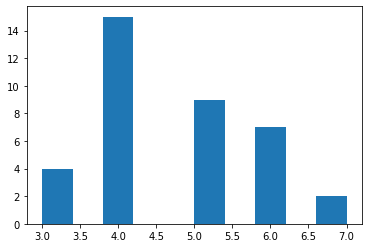

127.0.0.1 - - [25/Feb/2020 12:11:35] "GET /qtdbanheiros/4 HTTP/1.1" 200 -


In [106]:
@app.route("/qtdbanheiros/<qtd_ban>", methods=['GET'])
def qtdbanheiros(qtd_ban):
    qtd_ban = int(qtd_ban)
    query = { "qte_banheiros": qtd_ban }

    try:
        mydoc = mycol.find(query)
        df = pd.DataFrame(mydoc)
        
        plt.hist(df['qte_quartos'])
        plt.show()
        
        return df.to_json(default_handler=str, orient='records'), 200
    except:
        return "Não foi possível fazer SELECT na tabela.", 500

app.run(port=5001)

In [136]:
@app.route("/updatecep2", methods=['PUT'])
def updatecep2():
    post_args = request.json
    if "cep" not in post_args:
        return "O cep não foi informado no dado recebido.", 400
    
    filtro = { "cep": int(post_args["cep"]) }
    
    if "qte_quartos" in post_args:
        quartos=int(post_args["qte_quartos"])
        query = { "$set": { "qte_quartos": quartos } }
        mycol.update_many(filtro, query)
    if "qte_banheiros" in post_args:
        quartos=int(post_args["qte_banheiros"])
        query = { "$set": { "qte_banheiros": quartos } }
        mycol.update_many(filtro, query)
    if "area" in post_args:
        quartos=int(post_args["area"])
        query = { "$set": { "area": quartos } }
        mycol.update_many(filtro, query)
    if "preco" in post_args:
        quartos=int(post_args["qte_preco"])
        query = { "$set": { "qte_preco": quartos } }
        mycol.update_many(filtro, query)
    return "Registros atualizados com sucesso!", 200

app.run(port=5001)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5001/ (Press CTRL+C to quit)
127.0.0.1 - - [25/Feb/2020 12:42:55] "PUT /updatecep2 HTTP/1.1" 200 -


In [139]:
@app.route("/deletar", methods=['DELETE'])
def deletar():
    post_args = request.json
    if "cep" not in post_args:
        return "O cep não foi informado.", 400
    
    filtro = { "cep": int(post_args["cep"]) }
    mycol.delete_many(filtro)
    
    return "Registros deletados com sucesso!", 200

app.run(port=5001)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5001/ (Press CTRL+C to quit)
127.0.0.1 - - [25/Feb/2020 12:44:27] "DELETE /deletar HTTP/1.1" 200 -
